# Training

In [0]:
from fastai.vision import *

In [0]:
path = Path('path/to/spectrograms/')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [18]:
data.classes

['bonafide', 'spoof']

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,0.209063,0.186723,0.918426
2,0.169386,0.148646,0.933241
3,0.134832,0.111896,0.948148
4,0.127857,0.106812,0.950556


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.51E-05


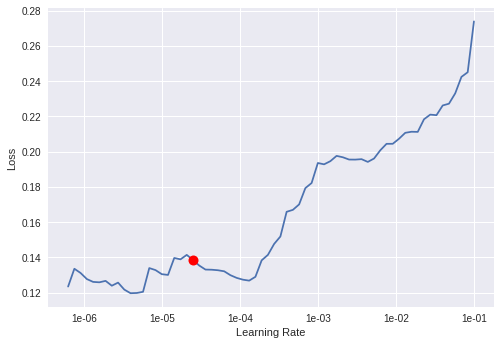

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,7e-6))

epoch,train_loss,valid_loss,accuracy
1,0.117509,0.095100,0.955926
2,0.105924,0.092530,0.956389
3,0.111739,0.091010,0.956481


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.101281,0.083127,0.958704
2,0.099710,0.079067,0.965833
3,0.082995,0.067647,0.968241
4,0.076074,0.063938,0.971852


In [0]:
learn.save('stage-3')

In [0]:
gc.collect()